In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# First just looking at demographic variables, original nutrition variables, physical activity and blood pressure and pulse

In [4]:
numerical_variables = ['RIAGENDR','RIDAGEYR','BMXBMI','BPXPLS','DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA','MET_rec','Systolic','Diastolic']
categorical_variables = ['RIDRETH3','DR1_300']

In [5]:
df1 = df[numerical_variables+categorical_variables+['LBXTC']].copy()

In [6]:
df1.dropna(inplace=True)

In [7]:
y = df1.LBXTC
X = df1.drop('LBXTC', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)

In [9]:
rf1 = RandomForestRegressor()

In [10]:
rf1.fit(X_train,y_train)

RandomForestRegressor()

In [11]:
pd.DataFrame({'features':X.columns, 'importance':rf1.feature_importances_}).sort_values(by='importance',ascending=False)

,features,importance
1,RIDAGEYR,0.107407
2,BMXBMI,0.059856
21,Diastolic,0.057445
3,BPXPLS,0.049519
20,Systolic,0.047369
18,DR1TPOTA,0.047147
16,DR1TCALC,0.047122
12,DR1TPFAT,0.046190
17,DR1TIRON,0.043593
14,DR1TSODI,0.043473


In [12]:
ypreds = rf1.predict(X_train)
print("RMSE",mean_squared_error(y_train,ypreds,squared=False))
print("MAE",mean_absolute_error(y_train,ypreds))

RMSE 14.989533734740602
MAE 11.463358270989191


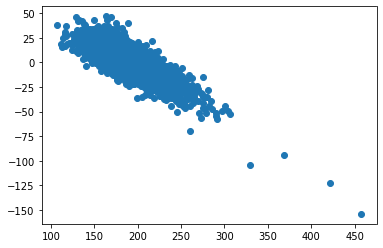

In [13]:
plt.scatter(ypreds,ypreds-y_train)

Removing outliers in the y

In [14]:
df2 = df1[df1.LBXTC<400].copy()
y = df2.LBXTC
X = df2.drop('LBXTC', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)

In [16]:
rf1.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
ypreds = rf1.predict(X_train)
print("RMSE",mean_squared_error(y_train,ypreds,squared=False))
print("MAE",mean_absolute_error(y_train,ypreds))

RMSE 14.613771659971414
MAE 11.331003882418193


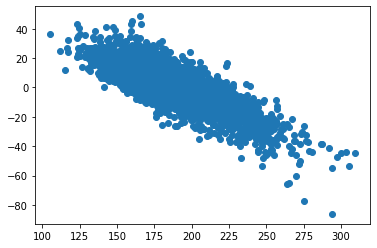

In [18]:
plt.scatter(ypreds,ypreds-y_train)

Removing the heavy outliers still gets a bad model.  Going to first switch to modified nutrition values, then will add chronic conditions, alcohol use, and smoking.

In [19]:
numerical_variables = ['RIAGENDR','RIDAGEYR','BMXBMI','BPXPLS','DR1TKCAL_t', 'DR1TPROT_t',
       'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t', 'DR1TSFAT_t',
       'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t', 'DR1TVD_t',
       'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t','MET_rec','Systolic','Diastolic']
categorical_variables = ['RIDRETH3']

In [20]:
df3 = df[numerical_variables+categorical_variables+['LBXTC']].copy()

In [21]:
df3.dropna(inplace=True)

In [22]:
y = df3.LBXTC
X = df3.drop('LBXTC', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)
rf1.fit(X_train,y_train)
ypreds = rf1.predict(X_train)
print("RMSE",mean_squared_error(y_train,ypreds,squared=False))
print("MAE",mean_absolute_error(y_train,ypreds))

RMSE 15.052521791210546
MAE 11.437021335550014


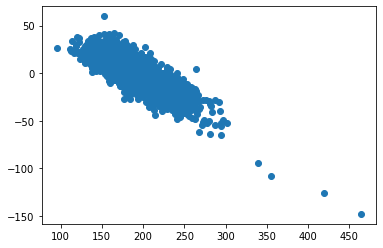

In [23]:
plt.scatter(ypreds,ypreds-y_train)

Capping the y values, like before and trying again

In [24]:
df4 = df3[(df3.LBXTC>100)&(df3.LBXTC<400)].copy()
y = df4.LBXTC
X = df4.drop('LBXTC', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)
rf1.fit(X_train,y_train)
ypreds = rf1.predict(X_train)
print("RMSE",mean_squared_error(y_train,ypreds,squared=False))
print("MAE",mean_absolute_error(y_train,ypreds))

RMSE 14.627983076903902
MAE 11.427835425383543


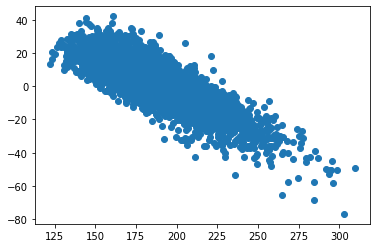

In [25]:
plt.scatter(ypreds,ypreds-y_train)

Going to try with all variables.. 

In [26]:
df.columns

Index(['LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI',
       'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA', 'DR1_300',
       'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610', 'PAD615', 'PAQ625',
       'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675', 'Systolic',
       'Diastolic', 'MET_work', 'MET_rec', 'DR1TKCAL_t', 'DR1TPROT_t',
       'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t', 'DR1TSFAT_t',
       'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t', 'DR1TVD_t',
       'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t', 'avgALC', 'log_LBXTC'],
      dtype='object')

In [27]:
df5 = df.copy()
df5.dropna(inplace=True)
y = df5.log_LBXTC
X = df5.drop(['LBXTC','log_LBXTC'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=625)
rf1.fit(X_train,y_train)
ypreds = rf1.predict(X_train)
print("RMSE",mean_squared_error(y_train,ypreds,squared=False))
print("MAE",mean_absolute_error(y_train,ypreds))

RMSE 0.07382295437197409
MAE 0.05711697788234305


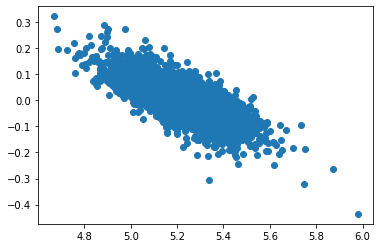

In [28]:
plt.scatter(ypreds,ypreds-y_train)

In [29]:
ypreds = rf1.predict(X_test)
print("RMSE",mean_squared_error(y_test,ypreds,squared=False))
print("MAE",mean_absolute_error(y_test,ypreds))

RMSE 0.20384465896209822
MAE 0.15728800735017606


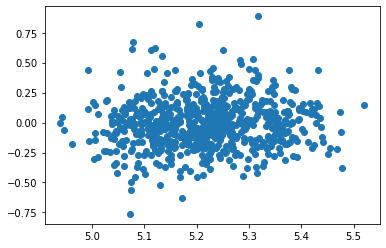

In [30]:
plt.scatter(ypreds,ypreds-y_test)